In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras
import keras as k

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Scaling the dataset in range 0-1

In [10]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [11]:
X_test = X_test / 255

In [13]:
y_train[:10]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4], dtype=uint8)

In [14]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

Display the first 16 images

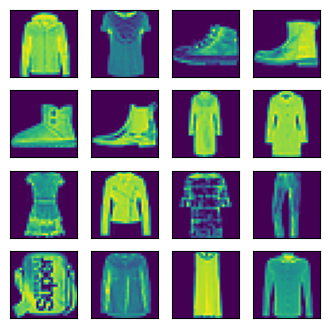

In [18]:
fig, ax = plt.subplots(4,4, figsize=(4,4))

for i, axi in enumerate(ax.flat):
  axi.imshow(X_train[i])
  axi.set(xticks=[], yticks=[])


Create our keras sequential model

In [19]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [23]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense, built=True>

Complie the model

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8528 - loss: 0.4241 - val_accuracy: 0.8552 - val_loss: 0.4142
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8553 - loss: 0.4151 - val_accuracy: 0.8656 - val_loss: 0.4058
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8562 - loss: 0.4088 - val_accuracy: 0.8648 - val_loss: 0.4051
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8627 - loss: 0.3956 - val_accuracy: 0.8686 - val_loss: 0.3949
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8602 - loss: 0.3968 - val_accuracy: 0.8648 - val_loss: 0.3939
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8627 - loss: 0.3955 - val_accuracy: 0.8696 - val_loss: 0.3862
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8640 - loss: 0.3862 - val_accuracy: 0.8708 - val_loss: 0.3864
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8658 - loss: 0.3865 - val_accuracy: 0

Evaluating the model

In [27]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.854236,0.418779,0.8552,0.414237
1,0.855909,0.413431,0.8656,0.405843
2,0.857927,0.406029,0.8648,0.405125
3,0.860455,0.400641,0.8686,0.394904
4,0.861327,0.395117,0.8648,0.393879


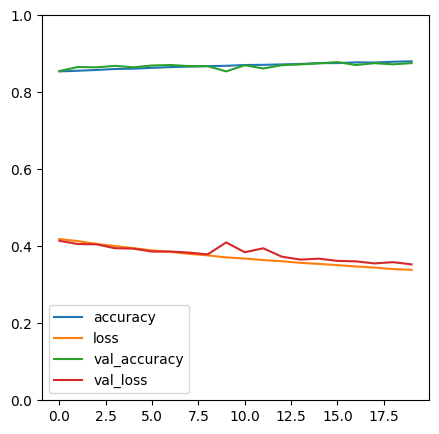

In [28]:
history_df.plot(figsize=(5,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8667 - loss: 0.3818


[0.3837333917617798, 0.8622999787330627]

Make predictions

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.1 , 0.  , 0.86],
       [0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
predict_x = model.predict(X_test)
y_pred =np.argmax(predict_x, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

Comapre the actual and predicted value

In [41]:
pred_list = list(zip(np.array(class_names)[y_test], np.array(class_names)[y_pred]))
pred_list

[('Ankle boot', 'Ankle boot'),
 ('Pullover', 'Pullover'),
 ('Trouser', 'Trouser'),
 ('Trouser', 'Trouser'),
 ('Shirt', 'Shirt'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Coat'),
 ('Shirt', 'Shirt'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Coat', 'Coat'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sandal'),
 ('Dress', 'Dress'),
 ('Coat', 'Coat'),
 ('Trouser', 'Trouser'),
 ('Pullover', 'Pullover'),
 ('Coat', 'Pullover'),
 ('Bag', 'Bag'),
 ('T-shirt/top', 'T-shirt/top'),
 ('Pullover', 'Pullover'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Ankle boot', 'Sneaker'),
 ('Trouser', 'Trouser'),
 ('Coat', 'Pullover'),
 ('Shirt', 'Shirt'),
 ('T-shirt/top', 'T-shirt/top'),
 ('Ankle boot', 'Ankle boot'),
 ('Dress', 'Dress'),
 ('Bag', 'Bag'),
 ('Bag', 'Bag'),
 ('Dress', 'Dress'),
 ('Dress', 'Dress'),
 ('Bag', 'Bag'),
 ('T-shirt/top', 'T-shirt/top'),
 ('Sneaker', 'Sneaker'),
 ('Sandal', 'Sandal'),
 ('Sneaker', 'Sneaker'),
 ('Ankle boot', 'Ankle boot'),
 ('Shirt', 'T-shirt/top'),
 ('Trouser', 

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

confusion_matrix(y_test, y_pred)

array([[858,   1,  12,  34,   3,   3,  76,   0,  13,   0],
       [  4, 966,   0,  24,   3,   0,   2,   0,   1,   0],
       [ 28,   4, 775,  13, 108,   0,  68,   0,   4,   0],
       [ 38,  12,  12, 876,  30,   0,  26,   0,   6,   0],
       [  0,   1,  97,  40, 779,   1,  72,   0,  10,   0],
       [  0,   0,   0,   2,   0, 934,   0,  37,   2,  25],
       [181,   2, 100,  32,  76,   1, 587,   0,  21,   0],
       [  0,   0,   0,   0,   0,  26,   0, 930,   0,  44],
       [  8,   1,   4,   8,   3,   2,  10,   5, 959,   0],
       [  0,   0,   0,   0,   0,   6,   0,  34,   1, 959]])

In [45]:
accuracy_score(y_test, y_pred)

0.8623

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.78      0.78      0.78      1000
           3       0.85      0.88      0.86      1000
           4       0.78      0.78      0.78      1000
           5       0.96      0.93      0.95      1000
           6       0.70      0.59      0.64      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

